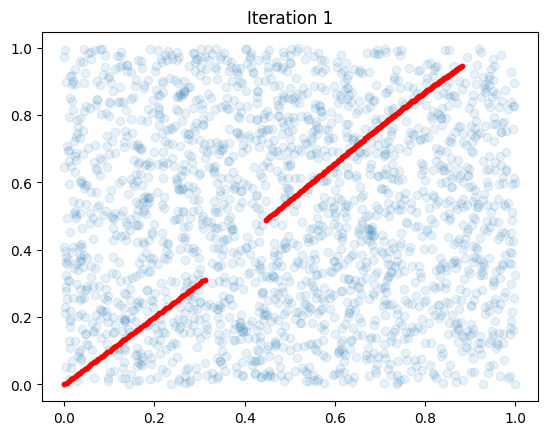

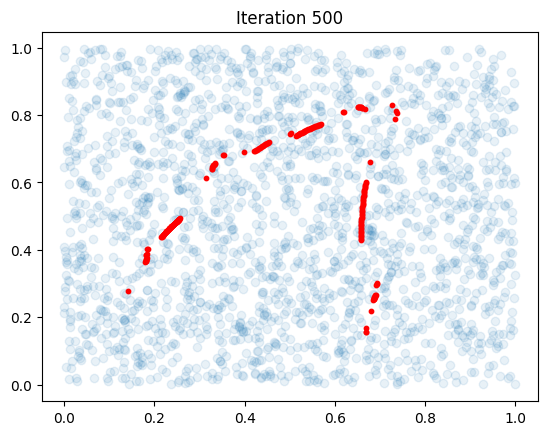

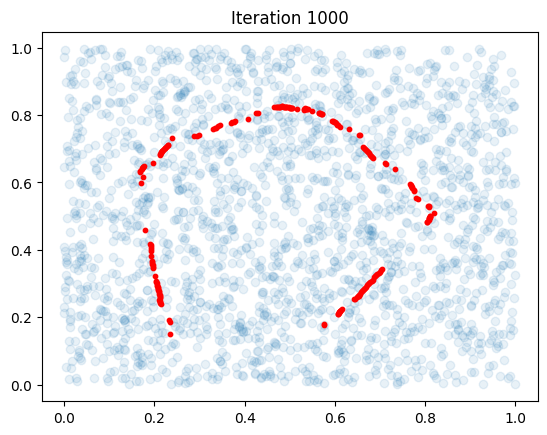

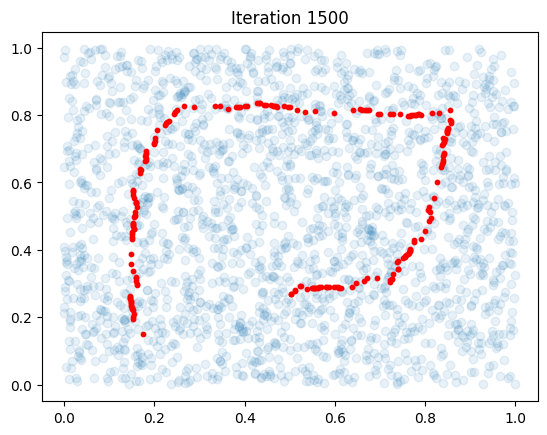

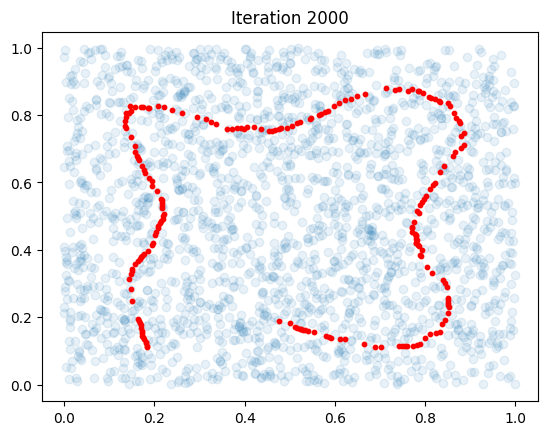

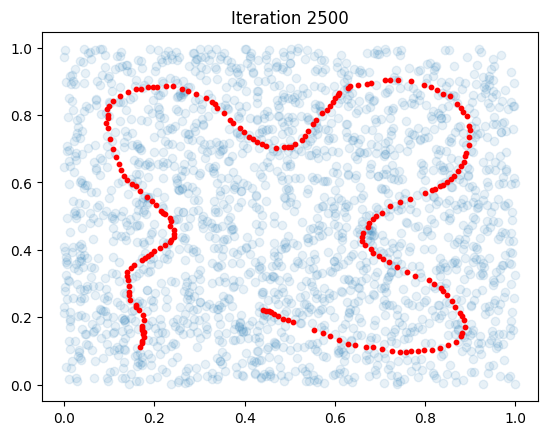

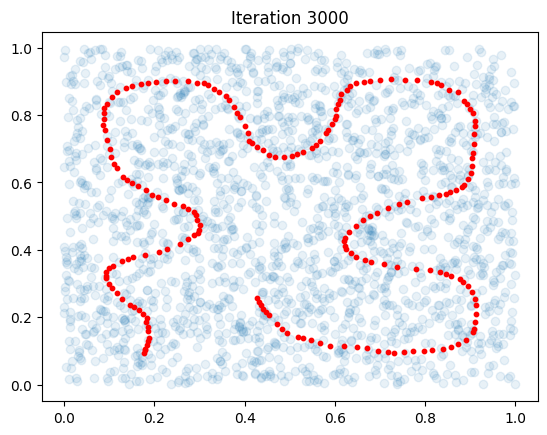

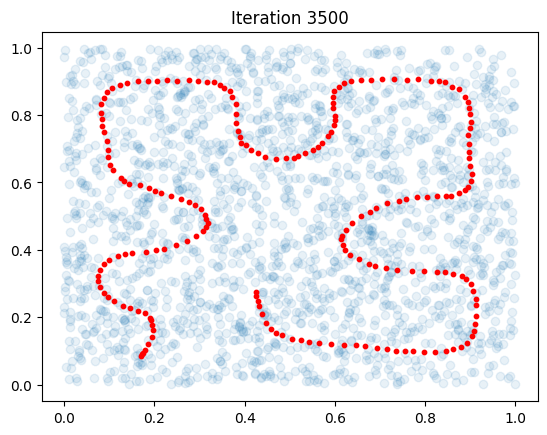

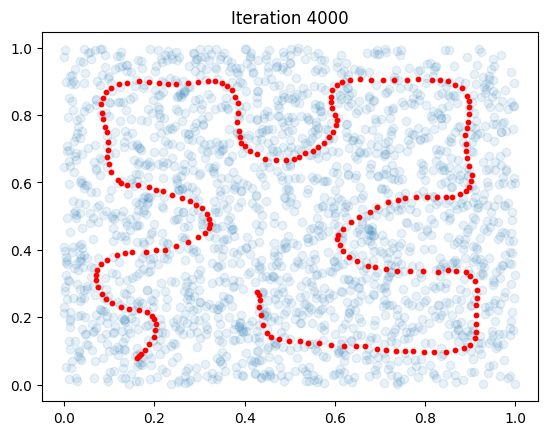

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

def generate_data(n=2000):
    random.seed(1)
    return pd.DataFrame(np.random.rand(n, 2))

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=-1)

def find_winner(point, neurons):
    distances = euclidean_distance(point, neurons)
    return np.argmin(distances)

def update_weights(weights, i, winner_idx, point, learning_rate, neighborhood):
    for idx, neuron in enumerate(weights):
        dist = np.abs(idx - winner_idx)

        if dist <= neighborhood:
            influence = np.exp(-(dist**2) / (2 * (neighborhood**2)))
            weights[idx] += learning_rate * influence * (point - neuron)
    return weights

def plot_neurons(iteration, neurons, data):
    plt.scatter(data[0], data[1], alpha=0.1)
    plt.scatter(neurons[:, 0], neurons[:, 1], color='r', marker='o', s=10)
    plt.title(f"Iteration {iteration}")
    plt.show()

def kohonen_algorithm(n_neurons, n_iterations, init_lr=0.5, decay_rate=1000):
    data = generate_data()
    neurons = np.linspace(0, 1, n_neurons)[:, np.newaxis] * np.array([1, 1])
    init_neighborhood = float(n_neurons) / 2

    for i in range(1, n_iterations + 1):
        point = data.sample().values[0]
        winner_idx = find_winner(point, neurons)

        lr = init_lr * np.exp(-i / decay_rate)
        neighborhood = init_neighborhood * np.exp(-i / decay_rate)

        neurons = update_weights(neurons, i, winner_idx, point, lr, neighborhood)

        if i % 500 == 0 or i == 1:
            plot_neurons(i, neurons, data)

    return neurons

# Run the algorithm using few neurons (20)
neurons_20 = kohonen_algorithm(20, 2500)

# Run the algorithm using many neurons (200)
neurons_200 = kohonen_algorithm(200, 4000)

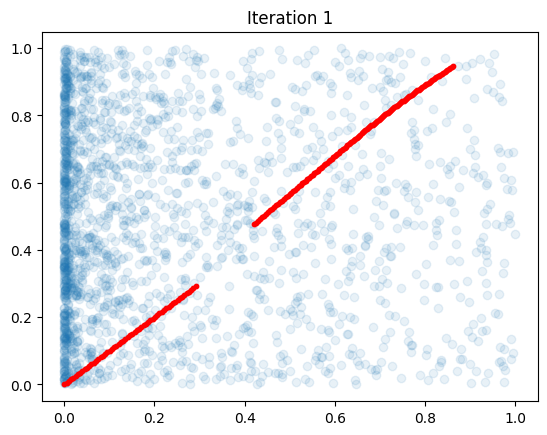

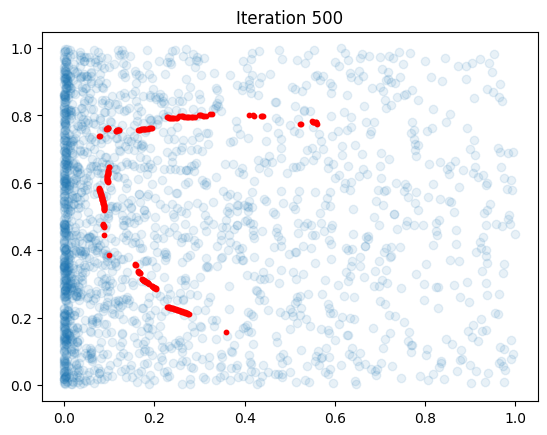

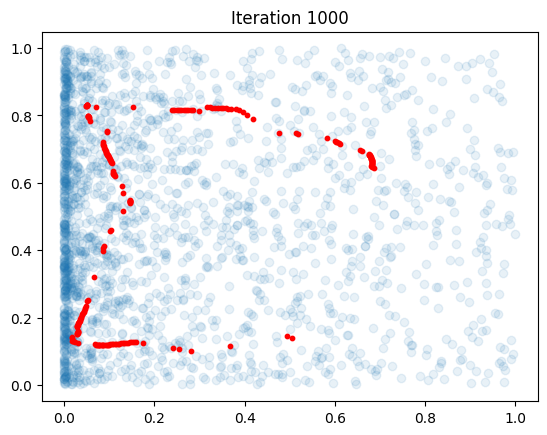

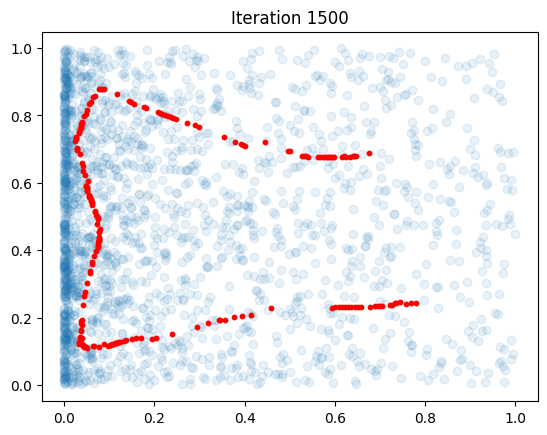

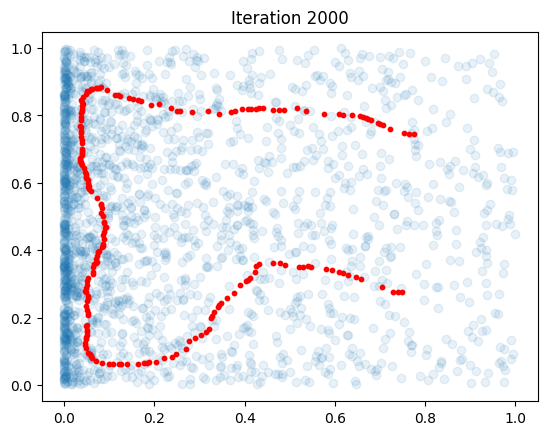

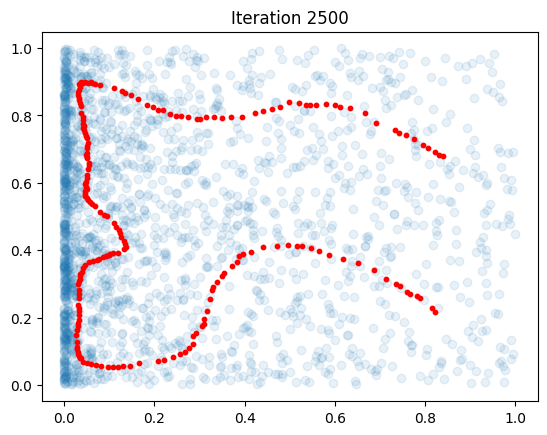

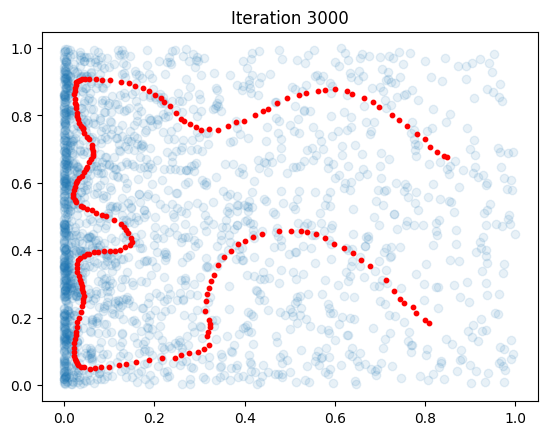

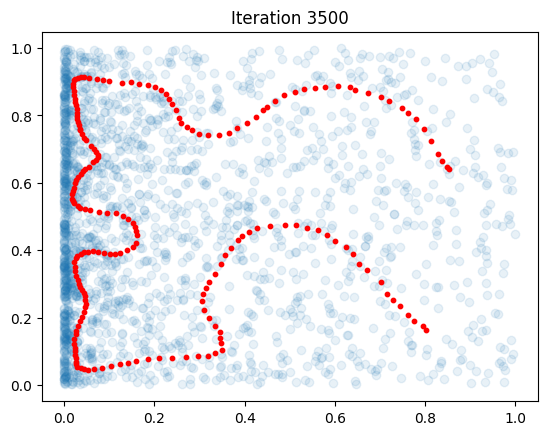

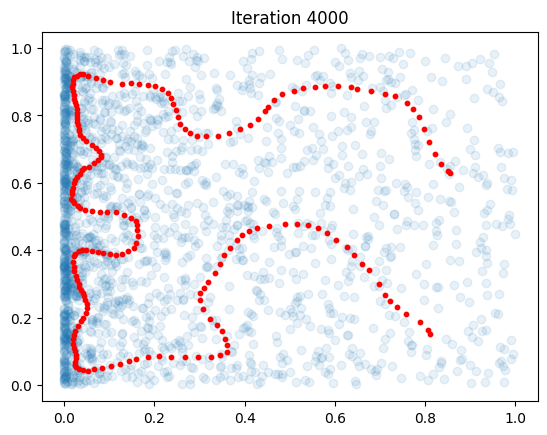

array([[0.85582589, 0.63045976],
       [0.85022888, 0.63517998],
       [0.83607157, 0.65487751],
       [0.82121569, 0.68448434],
       [0.80854267, 0.7224635 ],
       [0.79755345, 0.76072397],
       [0.78634855, 0.79598394],
       [0.77381384, 0.81958051],
       [0.7595439 , 0.83740991],
       [0.73263574, 0.85731967],
       [0.71122562, 0.86477589],
       [0.67898095, 0.87134173],
       [0.64848194, 0.87846081],
       [0.63481348, 0.88488082],
       [0.60779907, 0.88736407],
       [0.57887587, 0.88627697],
       [0.55524402, 0.88412286],
       [0.52966515, 0.8805709 ],
       [0.50906664, 0.8718233 ],
       [0.4829602 , 0.86318189],
       [0.46550207, 0.84539972],
       [0.45140352, 0.82395404],
       [0.44447584, 0.81204284],
       [0.43042559, 0.79018536],
       [0.41090677, 0.77178415],
       [0.38876206, 0.75935638],
       [0.36624421, 0.74765344],
       [0.34070307, 0.73872288],
       [0.31450913, 0.73914687],
       [0.29438568, 0.74021125],
       [0.

In [ ]:
#------- NON UNIFORM DISTRIBUTION -------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


# First non-uniform distribution
def generate_data_nonuniform_x(n=2000):
    random.seed(1)
    xs = np.random.uniform(0, 1, n)
    ys = np.random.uniform(0, 1, n)
    xs = xs**3  # Apply a transformation to the xs to make the distribution non-uniform
    return pd.DataFrame(np.vstack([xs, ys]).T)

# Second non-uniform distribution
def generate_data_gaussian(n=2000):
    random.seed(1)
    mean = [0.5, 0.5]  # Center of the Gaussian distribution
    cov = [[0.05, 0], [0, 0.05]]  # Covariance matrix to control the spread of the distribution
    points = np.random.multivariate_normal(mean, cov, n)
    points = np.clip(points, 0, 1)  # Clip the points to the square (0, 1)
    return pd.DataFrame(points)


def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=-1)

def find_winner(point, neurons):
    distances = euclidean_distance(point, neurons)
    return np.argmin(distances)

def update_weights(weights, i, winner_idx, point, learning_rate, neighborhood):
    for idx, neuron in enumerate(weights):
        dist = np.abs(idx - winner_idx)

        if dist <= neighborhood:
            influence = np.exp(-(dist**2) / (2 * (neighborhood**2)))
            weights[idx] += learning_rate * influence * (point - neuron)
    return weights

def plot_neurons(iteration, neurons, data):
    plt.scatter(data[0], data[1], alpha=0.1)
    plt.scatter(neurons[:, 0], neurons[:, 1], color='r', marker='o', s=10)
    plt.title(f"Iteration {iteration}")
    plt.show()

def kohonen_algorithm(n_neurons, n_iterations, init_lr=0.5, decay_rate=1000):
    data = generate_data_nonuniform_x() #<-------------- HERE CHANGE THE GENERATE DATA FUNCTION
    neurons = np.linspace(0, 1, n_neurons)[:, np.newaxis] * np.array([1, 1])
    init_neighborhood = float(n_neurons) / 2

    for i in range(1, n_iterations + 1):
        point = data.sample().values[0]
        winner_idx = find_winner(point, neurons)

        lr = init_lr * np.exp(-i / decay_rate)
        neighborhood = init_neighborhood * np.exp(-i / decay_rate)

        neurons = update_weights(neurons, i, winner_idx, point, lr, neighborhood)

        if i % 500 == 0 or i == 1:
            plot_neurons(i, neurons, data)

    return neurons

# Run the algorithm using many neurons (200)
kohonen_algorithm(200, 4000)

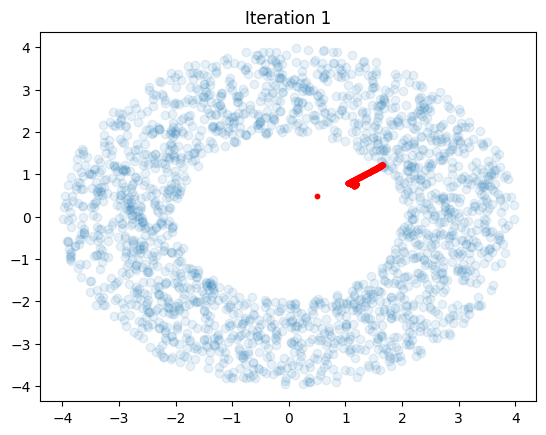

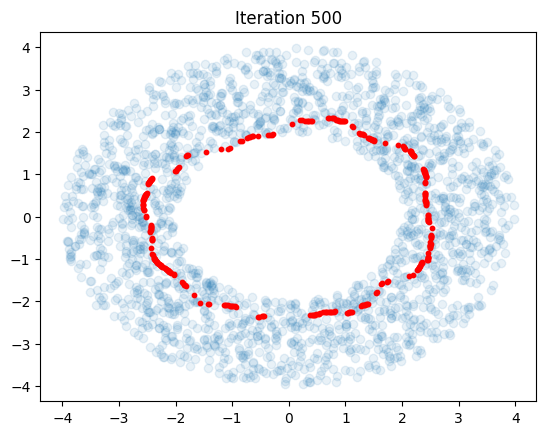

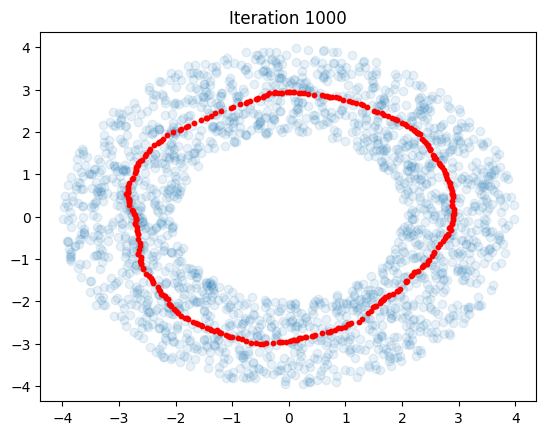

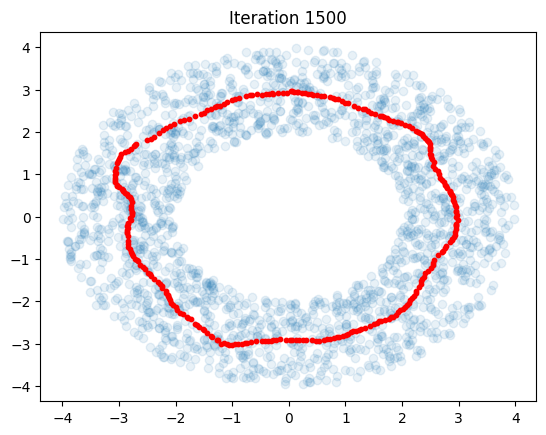

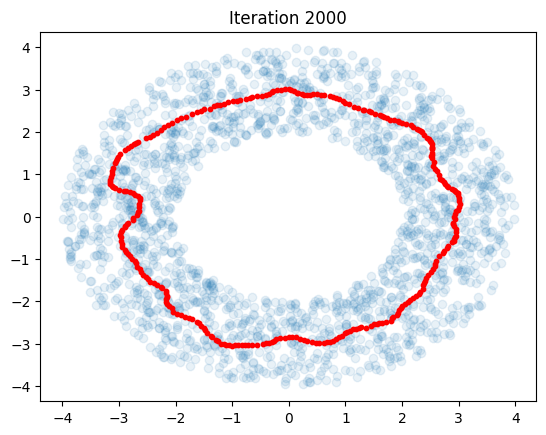

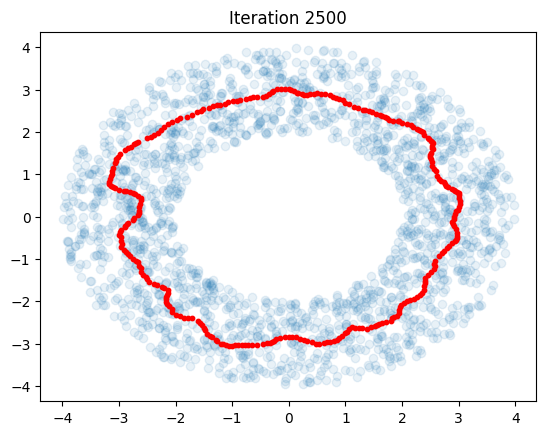

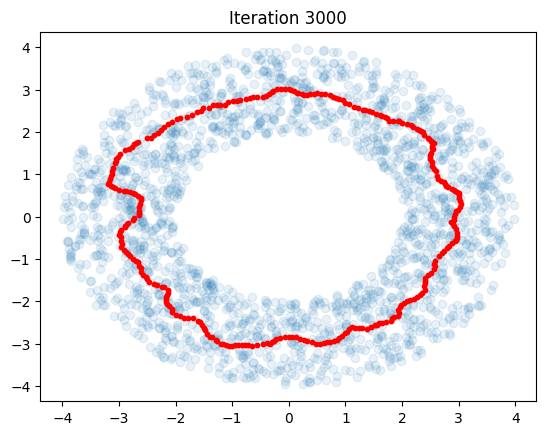

In [ ]:
#------ DONUT SHAPE -----------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def generate_data_donut_shape(n=2000):
    angles = np.random.uniform(0, 2 * np.pi, n)
    radii = np.random.uniform(np.sqrt(4), np.sqrt(16), n)
    xs = radii * np.cos(angles)
    ys = radii * np.sin(angles)

    return pd.DataFrame(np.column_stack([xs, ys]))

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=-1)

def find_winner(point, neurons):
    distances = euclidean_distance(point, neurons)
    return np.argmin(distances)

def update_weights(weights, winner_idx, point, learning_rate, neighborhood):
    for idx, neuron in enumerate(weights):
        dist = np.minimum(np.abs(idx - winner_idx), len(weights) - np.abs(idx - winner_idx))

        if dist <= neighborhood:
            influence = np.exp(-(dist**2) / (2 * (neighborhood**2)))
            weights[idx] += learning_rate * influence * (point - neuron)
    return weights

def plot_neurons(iteration, neurons, data):
    plt.scatter(data[0], data[1], alpha=0.1)
    plt.scatter(neurons[:, 0], neurons[:, 1], color='r', marker='o', s=10)
    plt.title(f"Iteration {iteration}")
    plt.show()

def kohonen_algorithm(n_neurons, n_iterations, init_lr=0.5, decay_rate=500):
    data = generate_data_donut_shape()
    neurons = np.linspace(0, 1, n_neurons)[:, np.newaxis] * np.array([1, 1])
    init_neighborhood = float(n_neurons) / 2

    for i in range(1, n_iterations + 1):
        point = data.sample().values[0]
        winner_idx = find_winner(point, neurons)

        lr = init_lr * np.exp(-i / decay_rate)
        neighborhood = init_neighborhood * np.exp(-i / decay_rate)

        neurons = update_weights(neurons, winner_idx, point, lr, neighborhood)

        if i % 500 == 0 or i ==1:
            plot_neurons(i, neurons, data)

    return neurons

# Run Kohonen algorithm on the donut shape dataset with 300 neurons on a circle
neurons_donut = kohonen_algorithm(300, 3000)
